# Advanced geospatial plotting

In [1]:
# Import Libraries
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load NYC Citibike dataset
df = pd.read_csv('nyc-citibike_data.csv', index_col=0, low_memory=False)

print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual', 'year_month', 'date', 'avgTemp',
       '_merge'],
      dtype='object')


In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,year_month,date,avgTemp,_merge
0,5772778972800B87,electric_bike,2023-12-20 06:18:04.187,2023-12-20 06:24:50.461,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,2023-12,2023-12-20,2.3,both
1,32DD834BEA2ABA5B,classic_bike,2023-12-21 16:15:52.308,2023-12-21 16:21:22.124,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,2023-12,2023-12-21,3.6,both
2,3B6B1AA2B94A01D1,classic_bike,2023-12-07 11:49:31.277,2023-12-07 11:56:07.264,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,2023-12,2023-12-07,2.1,both
3,A8F4C66161031B63,electric_bike,2023-12-26 06:17:43.385,2023-12-26 06:24:11.386,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,2023-12,2023-12-26,7.1,both
4,A6176AFE373FB4C8,electric_bike,2023-12-21 06:58:24.078,2023-12-21 07:04:17.045,E 53 St & 3 Ave,6617.02,1 Ave & E 68 St,6822.09,member,2023-12,2023-12-21,3.6,both


## Aggregate Trip Counts

In [4]:
# Add trip count column
df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [5]:
df_group

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,941
1,1 Ave & E 110 St,1 Ave & E 16 St,2
2,1 Ave & E 110 St,1 Ave & E 18 St,1
3,1 Ave & E 110 St,1 Ave & E 30 St,3
4,1 Ave & E 110 St,1 Ave & E 39 St,3
...,...,...,...
1378253,Yankee Ferry Terminal,Wyckoff St & 3 Ave,1
1378254,Yankee Ferry Terminal,Yankee Ferry Terminal,5293
1378255,York St & Marin Blvd,Grant Ave & MLK Dr,1
1378256,York St & Marin Blvd,Grove St PATH,1


In [6]:
print(df_group['value'].sum())
print(df.shape)

35001668
(35106710, 14)


In [7]:
df_group['value'].describe()

count    1.378258e+06
mean     2.539558e+01
std      9.065378e+01
min      1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.400000e+01
max      1.179700e+04
Name: value, dtype: float64

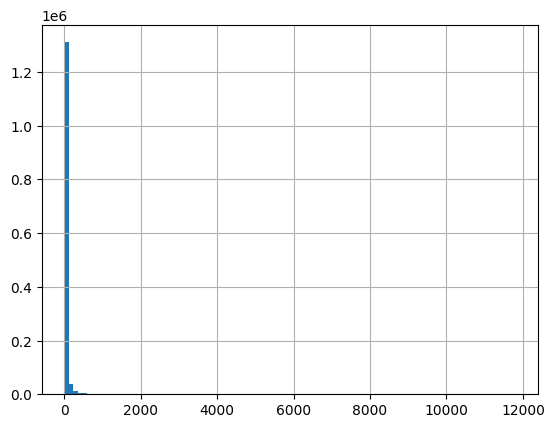

In [8]:
df_group['value'].hist(bins = 100)
plt.show()

[]

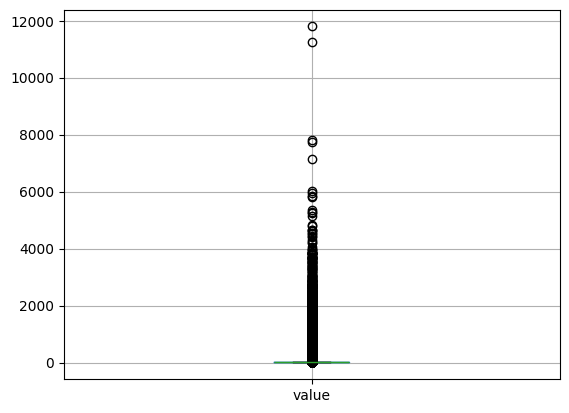

In [9]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [10]:
df_group['value'].sort_index().value_counts()

value
1       390317
2       183065
3       110966
4        77280
5        57328
         ...  
2007         1
1978         1
2068         1
1196         1
5293         1
Name: count, Length: 1886, dtype: int64

In [11]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,941
1,1 Ave & E 110 St,1 Ave & E 16 St,2
2,1 Ave & E 110 St,1 Ave & E 18 St,1
3,1 Ave & E 110 St,1 Ave & E 30 St,3
4,1 Ave & E 110 St,1 Ave & E 39 St,3


In [12]:
df_group.rename(columns = {'value': 'trips'}, inplace = True)

In [13]:
df_group

,start_station_name,end_station_name,trips
0,1 Ave & E 110 St,1 Ave & E 110 St,941
1,1 Ave & E 110 St,1 Ave & E 16 St,2
2,1 Ave & E 110 St,1 Ave & E 18 St,1
3,1 Ave & E 110 St,1 Ave & E 30 St,3
4,1 Ave & E 110 St,1 Ave & E 39 St,3
...,...,...,...
1378253,Yankee Ferry Terminal,Wyckoff St & 3 Ave,1
1378254,Yankee Ferry Terminal,Yankee Ferry Terminal,5293
1378255,York St & Marin Blvd,Grant Ave & MLK Dr,1
1378256,York St & Marin Blvd,Grove St PATH,1


In [14]:
df_group.to_csv('df_groupby_final.csv')

In [15]:
df_group.columns

Index(['start_station_name', 'end_station_name', 'trips'], dtype='object')

## Import and Merge latitude and longitude data from primary dataset

In [16]:
# Import primary data
df_citibike = pd.read_csv('citbike_2023.csv', index_col=0, low_memory=False)

print(df_citibike.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year_month'],
      dtype='object')


### DataFrame with station names + coordinates

In [17]:
# Get the first known coordinate per start station
start_coords = df_citibike.groupby('start_station_name')[['start_lat', 'start_lng']].first().reset_index()

# Same for end station
end_coords = df_citibike.groupby('end_station_name')[['end_lat', 'end_lng']].first().reset_index()

# Now do the merges — this will be efficient and safe
df_group = pd.merge(df_group, start_coords, how='left', on='start_station_name')
df_group = pd.merge(df_group, end_coords, how='left', on='end_station_name')


In [18]:
print(df_group.shape)
print(start_coords.shape)
print(end_coords.shape)

(1378258, 7)
(2305, 3)
(2315, 3)


In [19]:
df_group

,start_station_name,end_station_name,trips,start_lat,start_lng,end_lat,end_lng
0,1 Ave & E 110 St,1 Ave & E 110 St,941,40.79233,-73.938179,40.792327,-73.938300
1,1 Ave & E 110 St,1 Ave & E 16 St,2,40.79233,-73.938179,40.732219,-73.981656
2,1 Ave & E 110 St,1 Ave & E 18 St,1,40.79233,-73.938179,40.733812,-73.980544
3,1 Ave & E 110 St,1 Ave & E 30 St,3,40.79233,-73.938179,40.741444,-73.975361
4,1 Ave & E 110 St,1 Ave & E 39 St,3,40.79233,-73.938179,40.747140,-73.971130
...,...,...,...,...,...,...,...
1378253,Yankee Ferry Terminal,Wyckoff St & 3 Ave,1,40.68714,-74.016533,40.682755,-73.982586
1378254,Yankee Ferry Terminal,Yankee Ferry Terminal,5293,40.68714,-74.016533,40.687066,-74.016756
1378255,York St & Marin Blvd,Grant Ave & MLK Dr,1,40.72869,-74.012003,40.709198,-74.080843
1378256,York St & Marin Blvd,Grove St PATH,1,40.72869,-74.012003,40.719410,-74.043090


In [22]:
df_group.to_csv('df_final_locations_for_map.csv')

### Map Plot in notebook 2.5.2